# 18. 문자를 읽을 수 있는 딥러닝

# 실습목표

    1. OCR의 과정을 이해합니다.  
    2. 문자인식 결과의 표현방식을 이해합니다.  
    3. 파이썬을 통해 OCR을 사용할 수 있습니다.  


# 학습 내용

    • 기계가 읽을 수 있나요?  
    • 어떤 과정으로 읽을까요?  
    • 딥러닝 문자인식의 시작  
    • 사진 속 문자 찾아내기 - detection  
    • 사진 속 문자 읽어내기 - recognition
    • keras-ocr 써보기  
    • 태서랙트 써보기  
    • 프로젝트 : 다양한 OCR모델 비교하기  

# 순서
Step1. 검증용 데이터셋 준비  
Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행  
Step3. 테스트 결과 정리
Step4. 결과 분석과 결론 제시  

# Step1. 검증용 데이터셋 준비

## 라이브러리 import

In [1]:
import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# keras_ocr
import keras_ocr

# 테서랙트
import pytesseract
from pytesseract import Output

## 검증 이미지 준비
- 광고나 포스터 등의 다양한 글씨체의 이미지를 준비

In [2]:
tar_path = os.path.join(os.getenv("HOME"), 'aiffel', 'ocr_python', 'job_image')
tar_path

'/home/aiffel-dj56/aiffel/ocr_python/job_image'

In [3]:
img_paths = glob(tar_path+'/*')
img_paths

['/home/aiffel-dj56/aiffel/ocr_python/job_image/cardbanner_01_3.png',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/지도.png',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/배달의 민족 광고 이미지.jpeg',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/open-graph-apa-citation-generator.png',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/취업.png',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/thumb-100x75.jpg',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/위키백과.png',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/신규보고서.jpg',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/smallthumb_13.png',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/edit-text.png',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/다운로드.jpeg',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/대학신문.jpg',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/우리 함께해요.png',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/main-font-img.png',
 '/home/aiffel-dj56/aiffel/ocr_python/job_image/전산쟁이.png',
 '/home/aiffel-dj56/aiffel/ocr_py

In [4]:
#경로 저장
print(len(img_paths[:]))
img_paths = img_paths[:]
#print(img_paths)

22


## 데이터 확인
- 이미지 시각화

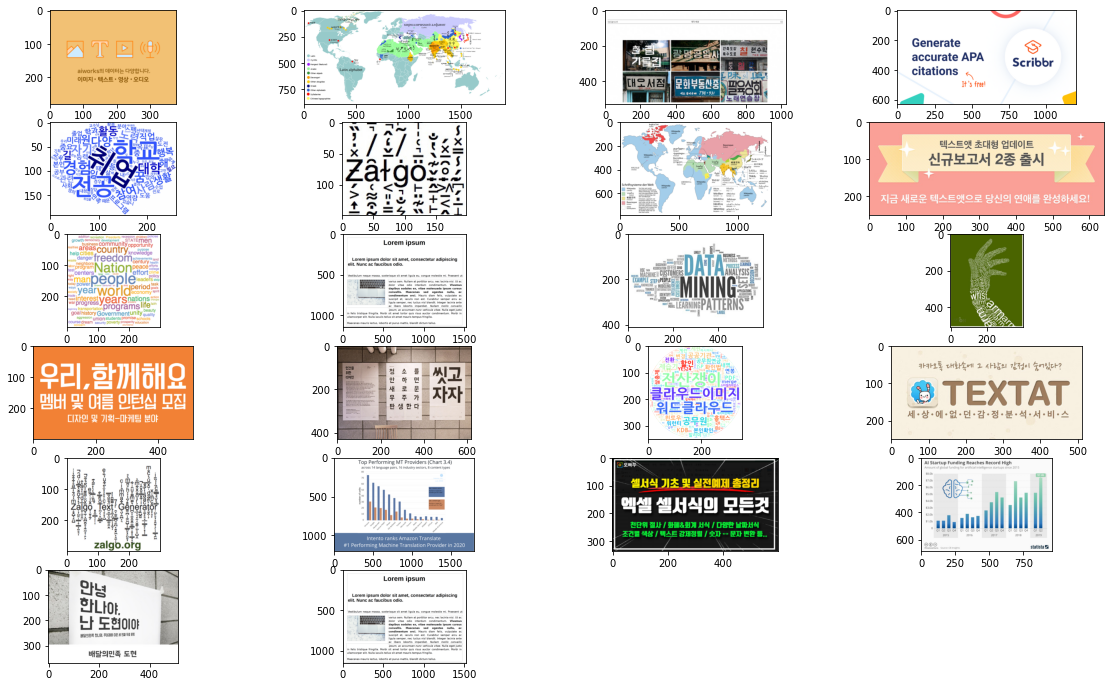

In [5]:
plt.figure(figsize = (20, 12))

for i in range(len(img_paths)):
    plt.subplot(6, 4, i+1)
    img = mpimg.imread(img_paths[i])
    plt.imshow(img)

plt.show()

# Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

# - Google OCR API

In [6]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [7]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

for img in img_paths:
    detect_text(img)

-rw-r--r-- 1 aiffel-dj56 aiffel-dj56 2361  3월 16 16:00 /home/aiffel-dj56/aiffel/ocr_python/my_google_api_key.json
Texts:

"TE (6)
aiworks의 데이터는 다양합니다.
이미지 텍스트· 영상· 오디오
"

"TE"

"(6)"

"aiworks"

"의"

"데이터"

"는"

"다양"

"합니다"

"."

"이미지"

"텍스트"

"·"

"영상"

"·"

"오디오"
bounds: (250,199),(295,199),(295,214),(250,214)
Texts:

"Yup'ik
(Inuktitut)
кириллический алфавит
(Manchu)
DASV:A
(Cyrillic)
(Cree)
(Georgian)
(Mongol)
(Hangeul)
カタカナ (Katakana)
Ελληνικό αλφάβητο
(Greek)
か
(Armenianl.,
Cwy
(Cherokee)
Ruino
(Syriac)
汉漢
(Kana & Kanji)
ת עברי
(Hebrew)
(Chinese)
(Gurmukhi)
(Tibetan)
+I[1.Y
(Yi)
देवनागरी
.Μετ Ρεμχήμ
(Mandaic)
すY
Pollard)
(Neo-Tifinagh)
(Nagari)
Bengal)
4X14EXr& (Zhuyin)
Nu Shu)
Giaratil
(Tifinagh)
(Arabic)
(Burmese) nu Thai)
orooiom PLTI (Baybayin Tagalog)
కa తెలుగు Teug
(ol Cemet')
தமிழ்எழத்த
Latin
21 (Khmer)
(Hanuno'o)
(Nko)
(Tamil)
(Malayalam
Cyrillic
(Ethiopic)
(Sinhala)
(Njuka)
zos
(Vai)
Hangeul (featural)
(Thaana)
(Batak)
(Lontara')
Latin alphabet
Arabic
(Sundanese)
Other a

Texts:

"Lorem ipsum
Lorem ipsum dolor sit amet, consectetur adipiscing
elit. Nunc ac faucibus odio.
Vestibulum neque massa, scelerisque sit amet ligula eu, congue molestie mi. Praesent ut
varius sem. Nullam at porttitor arcu, nec lacinia nisi. Ut ac
dolor vitae odio interdum condimentum. Vivamus
dapibus sodales ex, vitae malesuada ipsum cursus
nulla,
convallis.
Maecenas
sed
egestas
ac
condimentum orci. Mauris diam felis, vulputate ac
suscipit et, iaculis non est. Curabitur semper arcu ac
ligula semper, nec luctus nisl blandit. Integer lacinia ante
ac libero lobortis imperdiet. Nullam mollis convallis
ipsum, ac accumsan nunc vehicula vitae. Nulla eget justo
in felis tristique fringilla. Morbi sit amet tortor quis risus auctor condimentum. Morbi in
ullamcorper elit. Nulla iaculis tellus sit amet mauris tempus fringilla.
Maecenas mauris lectus, lobortis et purus mattis, blandit dictum tellus.
"

"Lorem"

"ipsum"

"Lorem"

"ipsum"

"dolor"

"sit"

"amet,"

"consectetur"

"adipiscing"

"el

Texts:

"안녕
한나야.
난 도현이야
배달의민족 한나체 주아2에 이은 M 번째 무료 폰트
배달의민족 도현
"

"안녕"

"한나"

"야"

"."

"난"

"도현"

"이야"

"배달"

"의"

"민족"

"한나"

"체"

"주아"

"2"

"에"

"이은"

"M"

"번째"

"무료"

"폰트"

"배달"

"의"

"민족"

"도현"
bounds: (299,321),(347,321),(347,345),(299,345)
Texts:

"Lorem ipsum
Lorem ipsum dolor sit amet, consectetur adipiscing
elit. Nunc ac faucibus odio.
Vestibulum neque massa, scelerisque sit amet ligula eu, congue molestie mi. Praesent ut
varius sem. Nullam at porttitor arcu, nec lacinia nisi. Ut ac
dolor vitae odio interdum condimentum. Vivamus
dapibus sodales ex, vitae malesuada ipsum cursus
nulla,
convallis.
Maecenas
sed
egestas
ac
condimentum orci. Mauris diam felis, vulputate ac
suscipit et, iaculis non est. Curabitur semper arcu ac
ligula semper, nec luctus nisl blandit. Integer lacinia ante
ac libero lobortis imperdiet. Nullam mollis convallis
ipsum, ac accumsan nunc vehicula vitae. Nulla eget justo
in felis tristique fringilla. Morbi sit amet tortor quis risus auctor condimentum. Morb

In [8]:
for img in img_paths[8:10]:
    detect_text(img)

Texts:

"budget body
addition recreation Presidents recession children policies
growth democracy development STATEMEN
business Community opportunity
realtios areas COuntry knowledge
help cities
danger freedom
purpose
achievements land
'century health
efforts
waste
neighbors
program Nationpeace
manpeopl eades
labor
test
"centers" law
right
effort crime
policy
today power rtus
period coais
task
chid
yearworldconomy sit
need interest
war progressyearsnations tion
bepne transportation Programslife
ways
society
trade:
action
changes
answers
faith
goal history Governmentunity quality
beauty
aggression unionstudents promise schools
course dream security poverty prosperity education
concern
abundance
"

"budget"

"body"

"addition"

"recreation"

"Presidents"

"recession"

"children"

"policies"

"growth"

"democracy"

"development"

"STATEMEN"

"business"

"Community"

"opportunity"

"realtios"

"areas"

"COuntry"

"knowledge"

"help"

"cities"

"danger"

"freedom"

"purpose"

"achievements"


### * Google API 인식 불가
다음 이미지와 같이 캘리그래피 처럼 일반 문자를 예술적으로 표현한 문자의 경우, 일정한 영역을 글자로 인식하는 알고리즘에 부합하지 않기 때문에 오류가 발생하는 것으로 보임

![png](img/이솦.png)

# - keras-ocr
---
- 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR
- 검출 모델 : CRAFT(Character Region Awarness for Text Detection)
- 인식 모델 : CRNN(Convolutional Recurrent Neural Network)
    - [RCNN?, CRNN?](https://ballentain.tistory.com/31)
---
- ```keras_ocr.pipeline.Pipeline()```
    - 인식을 위한 파이프라인을 생성, 이때 초기화 과정에서 <u>미리 학습된 가중치(weight)</u>를 불러온다.
    - 검출기, 인식기를 위한 가중치 하나씩을 불러온다.  
    <br>  
- 파이프라인의 ```recognize()```
    - 내부적으로 검출기와 인식기를 두고, 검출기로 바운딩 박스(Bounding Box, 문자가 있는 영역)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거친다  
    <br>  
- keras-orc는 한글 데이터셋으로 훈련이 되어 있지 않은 모델이기 때문에 한글 텍스트의 detection이 정상적으로 진행되지 않을 수 있다.

In [11]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj56/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel-dj56/.keras-ocr/crnn_kurapan.h5


/home/aiffel-dj56/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


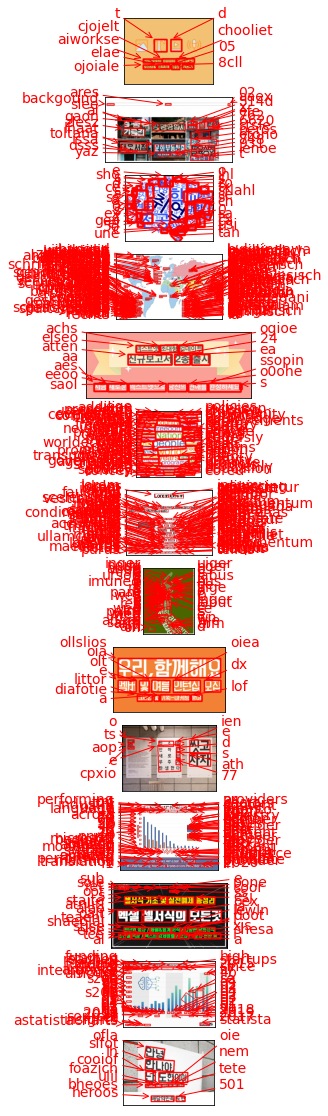

In [12]:
#random_idx = np.random.choice(np.arange(len(img_paths)), 5)
#random_idx = np.arange(len(img_paths))

random_idx = [0, 2, 4, 6, 7, 8, 9, 11, 12, 13, 17, 18, 19, 20]

image_paths = []

for i in random_idx:
    image_paths.append(img_paths[i])

images = [ keras_ocr.tools.read(path) for path in image_paths]
prediction_groups = [pipeline.recognize([path]) for path in image_paths]

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

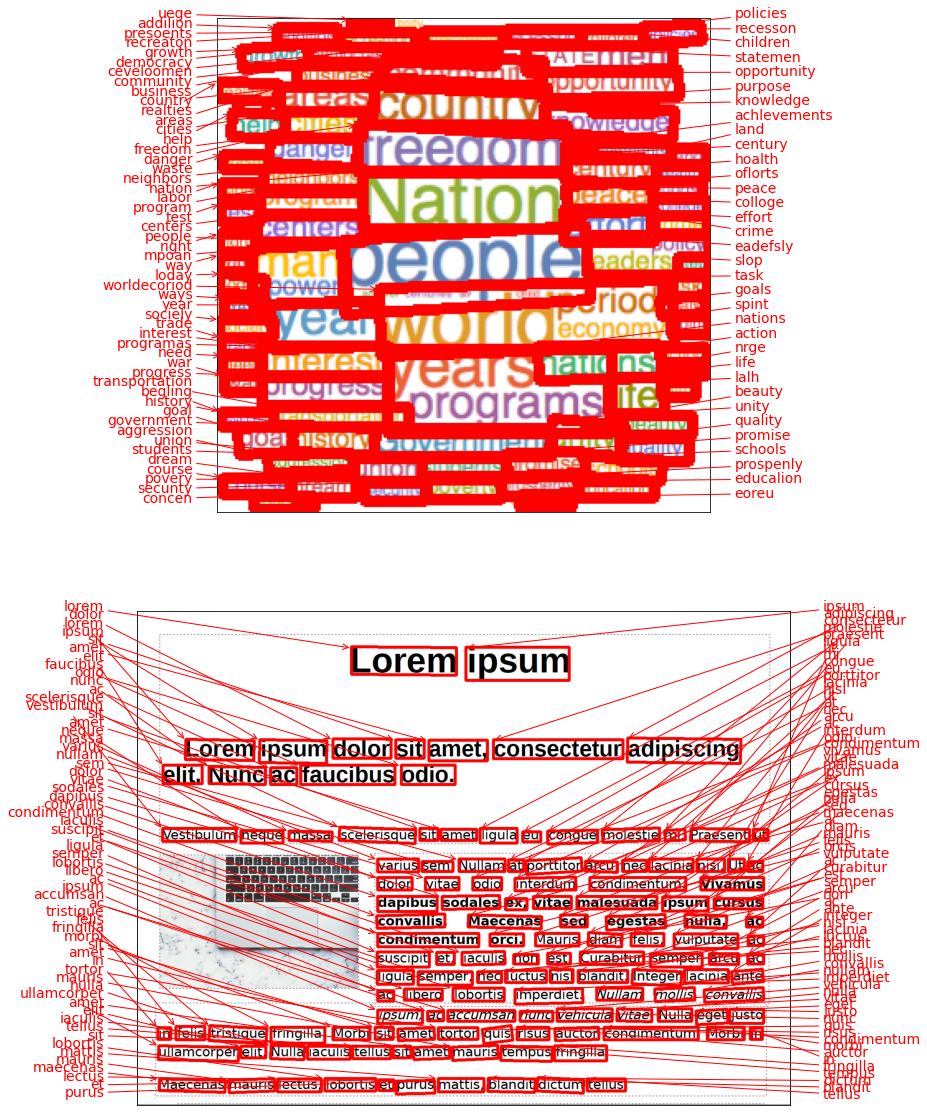

In [13]:
random_idx = [8, 9]

image_paths = []

for i in random_idx:
    image_paths.append(img_paths[i])

images = [ keras_ocr.tools.read(path) for path in image_paths]
prediction_groups = [pipeline.recognize([path]) for path in image_paths]

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## * keras-ocr 한글 인식 불가
위 결과와 같이 영문은 잘 인식 한글이외에 다른 언어에 대한 반응도 좋지 않았음.
언어팩을 설치하거나 다른 시도가 필요해 보임

# - Tesseract
---
- 구글에서 후원하는 OCR 오픈소스 라이브러리
- 버전 4에서는 LSTM이 엔진에 추가, 현재 한국어 포함 116개 언어를 지원
---
## 사용하기 전에
1. 테서랙트 설치
```Bash
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
```  
    
2. 테서랙트 파이썬 wrapper 설치
    - ```Pytesseract```는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수 있도록 해주는 래퍼 라이브러리
```Bash
$ pip install pytesseract
```  
    
3. 한국어 사용하기
    - 아래 코드에서 ```lang='kor'```로 한국어 사용 가능
    - 그 전에 테서랙트의 언어팩을 설치해야 정상적으로 동작
```Bash
$ sudo apt install tesseract-ocr-kor
```
---
### 문자 검출, 이미지 자르기 (detection)
- ```crop_word_regions()``` 함수
    - 이미지를 받아서, 문자를 검출한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴
    - ```pytesseract.image_to_data()```
        - ```pytesseract```의 ```Output```을 사용해서 결과값의 형식을 딕셔터리 형식으로 설정
    - 인식된 결과가 ```recognized_data```에 저장, 바운딩 박스의 left, top, width, height 정보 

In [14]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [15]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
# img_file_path = work_dir + '/images/13.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
cropped_image_path_list = []
for i in range(len(image_paths)) :
    img_file_path = image_paths[i]
    if not os.path.exists(os.path.join(work_dir, f'result_{i}')) :
        os.makedirs(os.path.join(work_dir, f'result_{i}'))
    
    tmp = crop_word_regions(img_file_path, os.path.join(work_dir, f'result_{i}'))
    print(f'{i+1}번째 이미지 완료')
    cropped_image_path_list.extend(tmp)

/home/aiffel-dj56/aiffel/ocr_python/result_0/0000.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0001.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0002.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0003.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0004.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0005.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0006.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0007.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0008.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0009.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0010.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0011.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0012.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0013.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0014.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0015.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0016.png
/home/aiffel-dj56/aiffel/ocr_python/result_0/0017.png
/home/aiffel-dj56/aiffel/ocr

In [16]:
cropped_image_path_list

['/home/aiffel-dj56/aiffel/ocr_python/result_0/0000.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0001.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0002.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0003.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0004.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0005.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0006.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0007.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0008.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0009.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0010.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0011.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0012.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0013.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0014.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0015.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0016.png',
 '/home/aiffel

### 잘린 이미지에서 단어 인식하기
- ```image_to_string```
    - 검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결과값으로 나온다.  
    <br>  
- ```random_idx``` : 랜덤 인덱스

    - 영양 성분표의 경우 한 이미지에 포함된 정보가 매우 많기 때문에 위에서 detection 하고나서 자른 이미지들중 랜덤하게 5개를 가져온다.
    
    - ```np.random.choice(..., replace=False)``` : 비복원 추출
    
    ```python
    import numpy as np
    np_arr = np.arange(10)  
    # array([0, 1, 2, ..., 8, 9])
    random = np.random.choice(np_arr, 5, replace=False) 
    # array([7, 3, 2, 6, 0])
    ```  
    <br>  
- ```cropped_image_paths``` : 랜덤한 이미지 경로 리스트
    - 기존에 detection후에 crop한 이미지들이 저장되어 있는 리스트 ```cropped_image_path_list```로부터 랜덤하게 경로들을 따로 리스트로 받아주었다.

In [17]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [18]:
random_idx = np.random.choice(np.arange(len(cropped_image_path_list)), 5, replace=False)

# cropped_image_path_list 에서 랜덤하게 선택해서 copped_image_paths에 저장

cropped_image_pahts = []
for idx in random_idx:
    cropped_image_pahts.append(cropped_image_path_list[idx])
cropped_image_pahts

['/home/aiffel-dj56/aiffel/ocr_python/result_1/0051.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_1/0038.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_1/0033.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_1/0020.png',
 '/home/aiffel-dj56/aiffel/ocr_python/result_0/0050.png']

In [19]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_pahts)

convallis.

dolor

nec

iigula

‘unity

Done


OCR을 수행해서 자른 이미지들을 인식해서 글자 출력과 비교해 보았다. 
이미지가 좀더 진하고 선명한 경우 더 인식이 잘 되었고, 이미지 색깔이나 변형이 가해진 이미지는 문자 인식이 잘 되지 않았다. 

# Step3. 테스트 결과 정리

---

 `비교 1 : /home/aiffel-dj56/aiffel/ocr_python/job_image/다운로드.jpeg`
 ![png](img/다운로드.jpeg)
 `비교 2 : /home/aiffel-dj56/aiffel/ocr_python/job_image/edit-text.png` 
 ![png](img/edit-text.png)
 
1. Google OCR API
    - 결과 캡쳐  
    
        **비교 1 :** ![png](img/8_text결과1.png)
        
        **비교 2 :** ![png](img/9_text결과1.png)

    <br>  
    
2. keras-ocr
    - 결과 캡쳐   
    
       **비교 1 / 비교 2 :** ![png](img/9_text결과2.png)
       
    - 한글을 전혀 인식하지 못한다.
    - 영어와 숫자 또한 제대로 인식하지 못하였다.  
    
    <br>  
    
3. Tesseract
    - 결과 캡쳐  
         
    - 비교적 한글을 잘 인식하지만 Google OCR API보다는 인식률이 떨어짐    
 ---

convallis.

Done


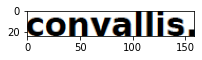

dolor

Done


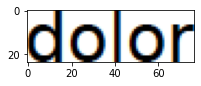

nec

Done


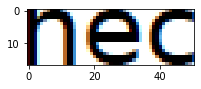

iigula

Done


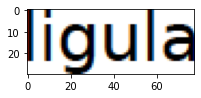

‘unity

Done


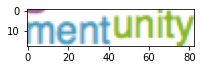

In [20]:
# Tesseract 결과 비교
for i in range(5) :
    plt.figure(figsize = (3, 3))
    pil_img = Image.open(cropped_image_pahts[i])
    recognize_images([cropped_image_pahts[i]])
    plt.imshow(pil_img)
    plt.show()

## * 모델별 성능 비교

- 다음과 같은 순서대로 좋은 성능을 보여준다.

    1. Google OCR API
    장점 : 특별한 언어를 선택하지 않아도 어느정도 인식 가능  
    단점 : Google API 사용을 위한 계정 등록 및 결제 등록 과정  
    
    2. Tesseract  
    장점 : 이미지와 바로 인식된 결과를 화살표로 표시하여 바로 확인 가능  
    단점 : 영문 이외 언어에 인식이 되지 않는다.  
       
    3. keras-ocr
    장점 : 문장을 단어별로 끊어서 따로 잘라서 문자 인식
    단점 : 변형된 형태의 문자 이미지 경우 성능이 좋지 못함
        

# ◈ 루브릭

평가문항/상세기준
1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?  
목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.


2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?  
평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.


3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?  
최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.


# 회고
- 이번 프로젝트에서 **어려웠던 점,**
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
- **자기 다짐**

***
***

# ◈ 결과 및 고찰

여러 가지 문자 인식 모델을 사용하여 각각의 장단점을 비교해 볼 수 있었다.
현재 많이 사용되는 카드 번호나 명함 인식 등의 OCR의 원리를 잘 이해할 수 있었다.
좀더 잘 인식을 시킬 수 있는 방법에 대한 내용이 노드에 포함이 되어 있다면 좀더 재미 있지 않을까 싶었다. 

많은 이미지를 로드하여 사용하다보니 메모리 부족 현상을 계속 겪었다.
모델별로 코드를 나눠서 실행하는 것으로 결과를 얻을 수 있었다. 